# Assignment2 - Question 1  (Alejandro Akifarry - 301-195-788)
---

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans, DBSCAN

---

## 1. Retrieve and load Olivetti faces

In [2]:
olivetti_faces = fetch_olivetti_faces()

In [3]:
X = olivetti_faces.data
y = olivetti_faces.target
images = olivetti_faces.images # 64x64 version of .data
print(X.shape)
print(y.shape)

(400, 4096)
(400,)


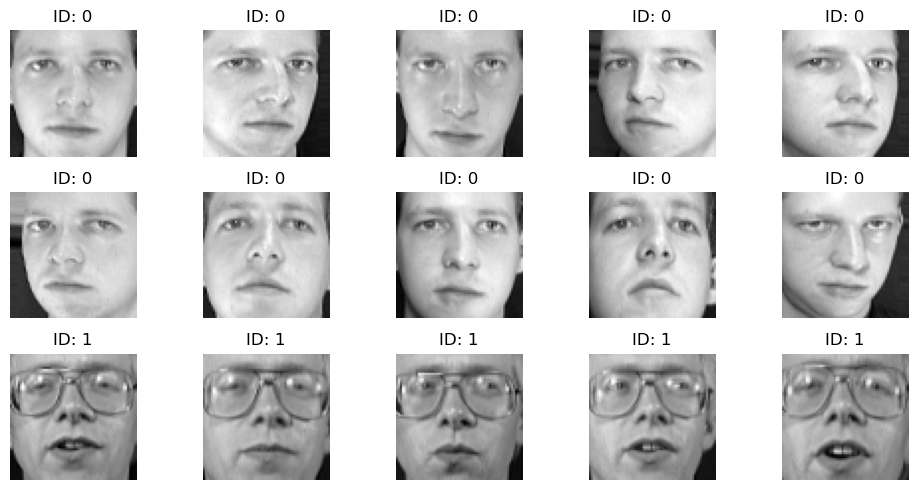

In [4]:
# Plot first 15 images
fig, axes = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"ID: {y[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

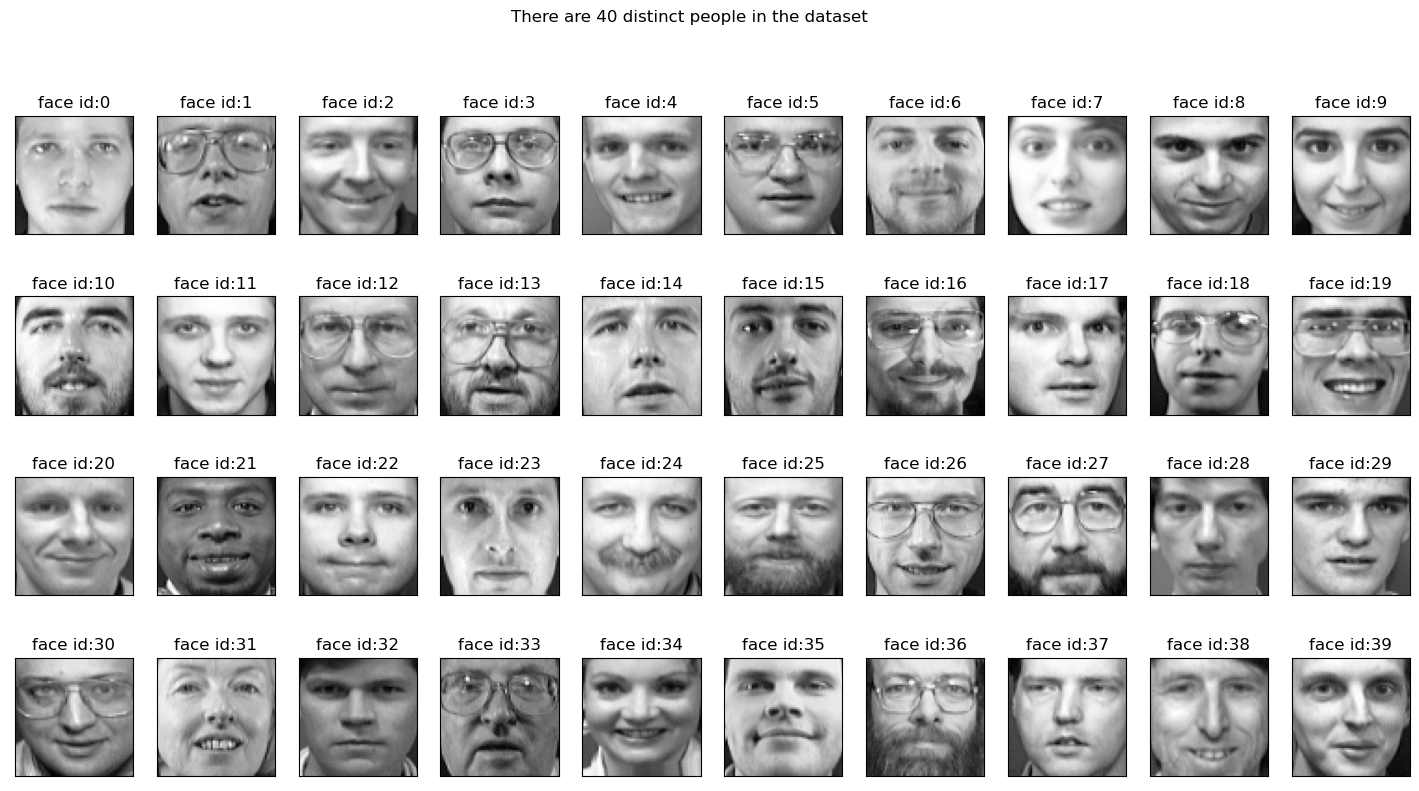

In [5]:
# From Reference [1]
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

show_40_distinct_people(images, np.unique(y))

---

## 2. Split train, val, test with stratified sampling

In [6]:
'''
Split is:
80% train
10% validation
10% test
to ensure we have a lot of data to train, 
and also still have some left for validation and testing
'''
# First split into train + validation (90%) and test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)

# Now split the train + validation set (90%) into train (80%) and validation (10%)
# 10/90 = 0.1111
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, random_state=42, stratify=y_train_val)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(320, 4096)
(40, 4096)
(40, 4096)


<AxesSubplot:title={'center':'Number of Samples for Each Classes (TRAIN)'}, xlabel='subject ids'>

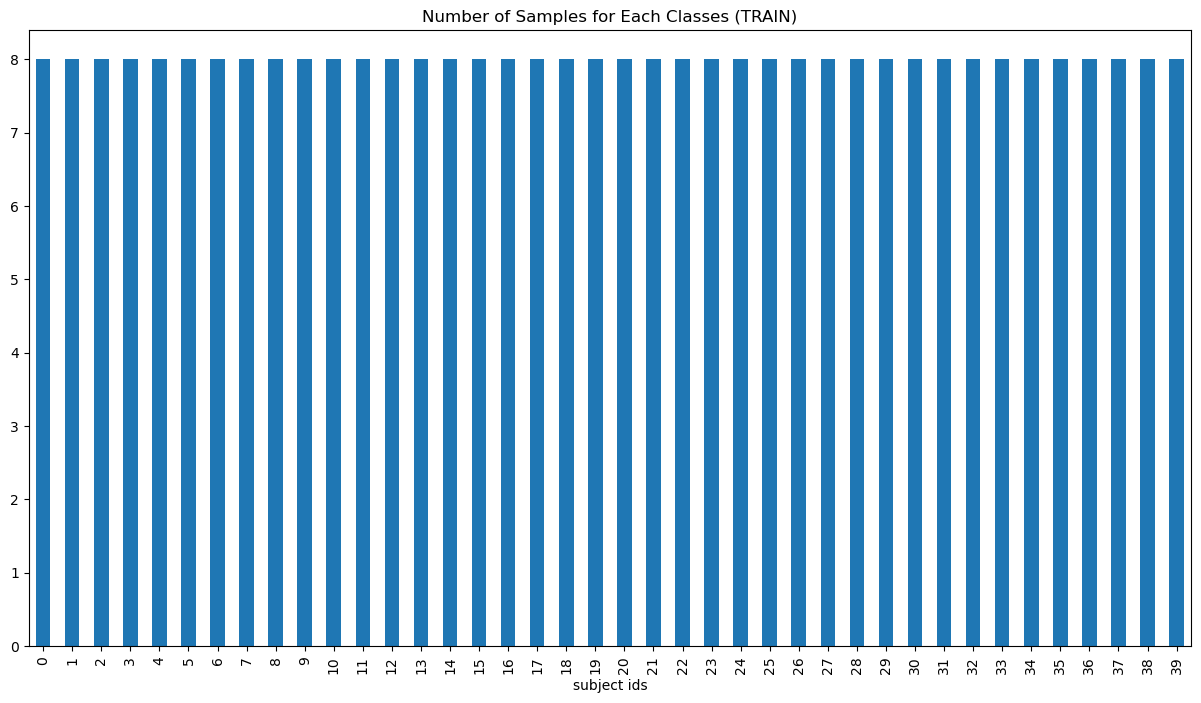

In [8]:
# From Reference [1]
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes (TRAIN)")

<AxesSubplot:title={'center':'Number of Samples for Each Classes (VALIDATION)'}, xlabel='subject ids'>

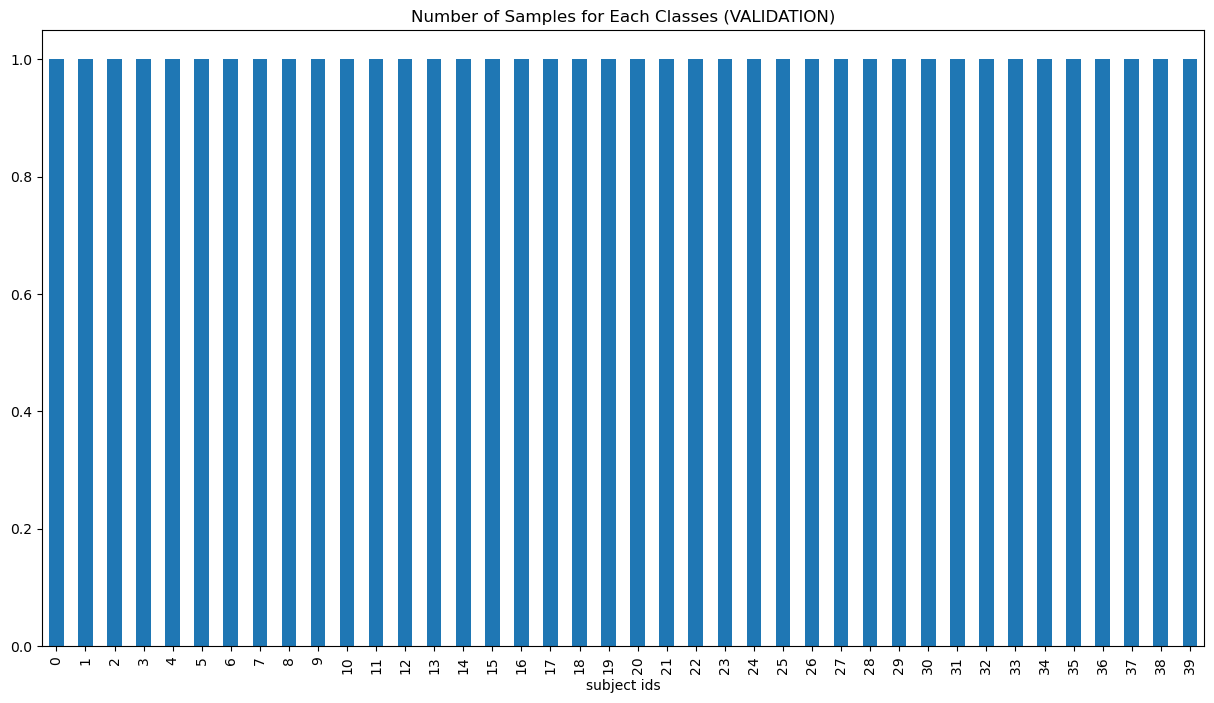

In [10]:
# From Reference [1]
y_frame=pd.DataFrame()
y_frame['subject ids']=y_val
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes (VALIDATION)")

<AxesSubplot:title={'center':'Number of Samples for Each Classes (TEST)'}, xlabel='subject ids'>

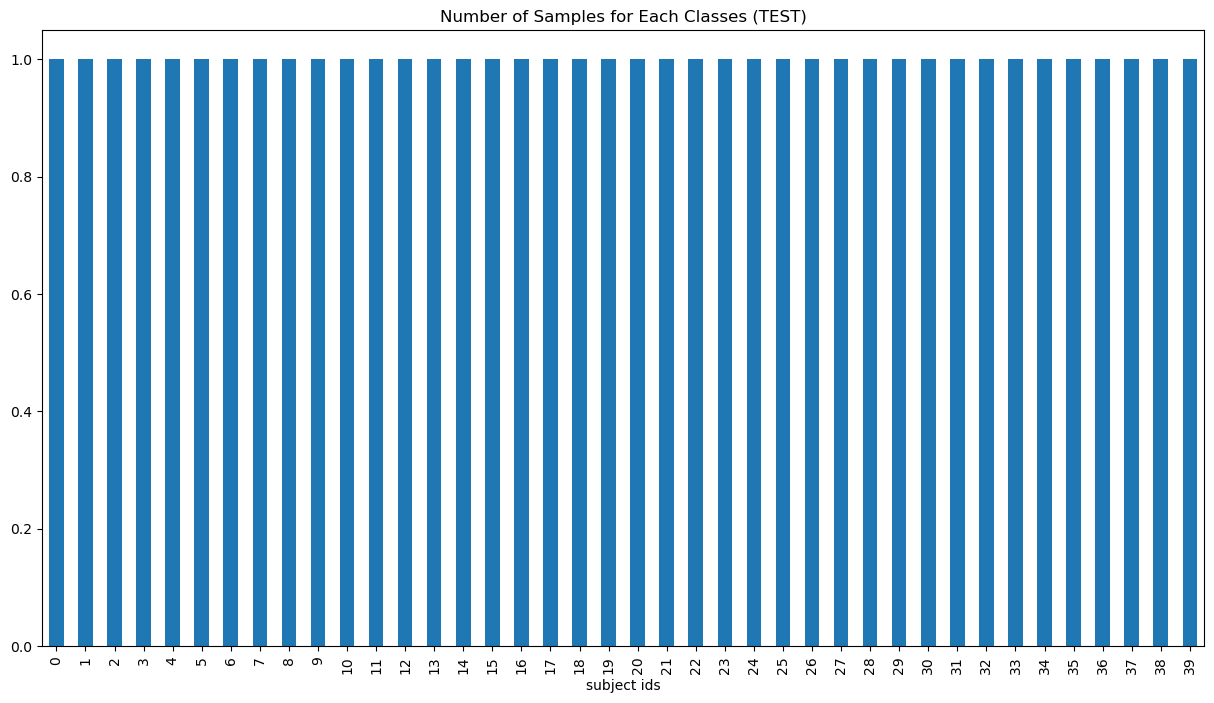

In [11]:
# From Reference [1]
y_frame=pd.DataFrame()
y_frame['subject ids']=y_test
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes (TEST)")

---

## 3. Use k-fold CV, train a classifier, and evaluate on validation set

In [12]:
# Use SVC with linear kernel
clf = SVC(kernel='linear', random_state=42)

# Instantiate StratifiedKFold
# use n_splits=4 so the 8 training samples per class can be evenly distributed
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Run k-fold CV
cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')

# Print scores
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Train the classifier on the entire training set
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation set accuracy: {val_accuracy:.4f}")

Cross-validation accuracy scores: [0.95   0.9875 0.9875 0.9375]
Mean cross-validation accuracy: 0.9656
Validation set accuracy: 0.9750


---

## 4. Use K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters.

For k = 20, the silhouette score is 0.1045
For k = 21, the silhouette score is 0.1123
For k = 22, the silhouette score is 0.1116
For k = 23, the silhouette score is 0.1116
For k = 24, the silhouette score is 0.1127
For k = 25, the silhouette score is 0.1186
For k = 26, the silhouette score is 0.1263
For k = 27, the silhouette score is 0.1167
For k = 28, the silhouette score is 0.1280
For k = 29, the silhouette score is 0.1212
For k = 30, the silhouette score is 0.1282
For k = 31, the silhouette score is 0.1298
For k = 32, the silhouette score is 0.1267
For k = 33, the silhouette score is 0.1358
For k = 34, the silhouette score is 0.1358
For k = 35, the silhouette score is 0.1383
For k = 36, the silhouette score is 0.1404
For k = 37, the silhouette score is 0.1427
For k = 38, the silhouette score is 0.1446
For k = 39, the silhouette score is 0.1421
For k = 40, the silhouette score is 0.1461
For k = 41, the silhouette score is 0.1523
For k = 42, the silhouette score is 0.1544
For k = 43,

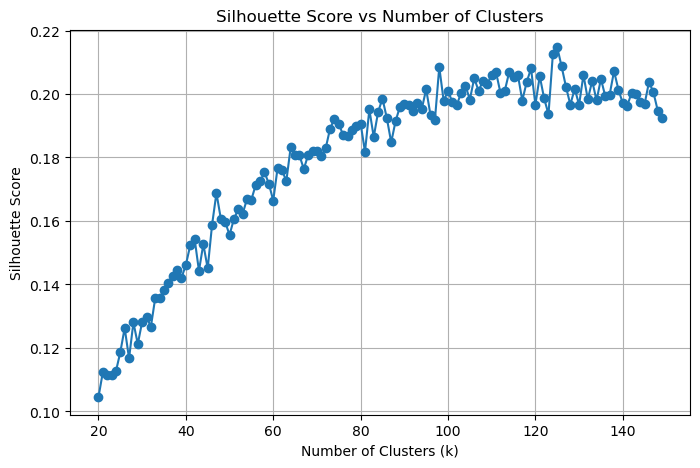

The optimal number of clusters is: 125


In [14]:
# Try different values of k
cluster_range = range(20, 150)
silhouette_scores = []

# Perform KMeans clustering and compute the silhouette score for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the silhouette score is {silhouette_avg:.4f}")

# Plot silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_k}")

In [13]:
optimal_k = 125
# Reduce dimensionality to the optimal k found previously
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
X_reduced = kmeans_optimal.fit_transform(X)

In [14]:
print(X.shape)
print(X_reduced.shape)

(400, 4096)
(400, 125)


In [15]:
# labels will become which cluster the data belongs to
# instead of the person id
y_reduced = kmeans_optimal.labels_
print(y_reduced.shape)
print(y_reduced)

(400,)
[  6  16  46  22 100  22   6  83   6 100  56  23  52  52  52  23  56  56
  23  56  57  57  57  66  66  44 119 119  85  85  95 114  95  15  15  22
  15  95 114 117   1  99  99   1  33  33   1  33  33   5  63  63  63  60
  60  60  13  60  13  60  96  92  62 104 104  62  50  50  62  96  59  59
  43  81  43 109  88  43  69  88 116 116 116  65  65  65  65  65  65 116
  68  68  27  27  68 108 108  68  78 109  94  94  94 123  94  94  37  37
 123  94 110  58  58  41  58 110  58  55  55  55 107 107 120 120  98 117
  64  64  98  98  77  18  18  77  77  18  77  18  18  18   8  26   8   8
  26   8  26  26  26  26  90  46  46  54  54  90  89 102   6  46  25  25
  82  82  25  97  97  25  40  97  47 122  72 122  72  72  47  72  47  72
  38  38  38  20  20  38  20  20  20  38  51  51  51  75  45  75  45  45
  45  51   2   2   2  61  61  61  64  64  61  64  11  11  11 124 106 124
 106 106 106 106 113 117  12  48  12  48  12 117  48  48  36  36   4   4
 121  36  36  36   4   4   7  80   7  80  17

<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

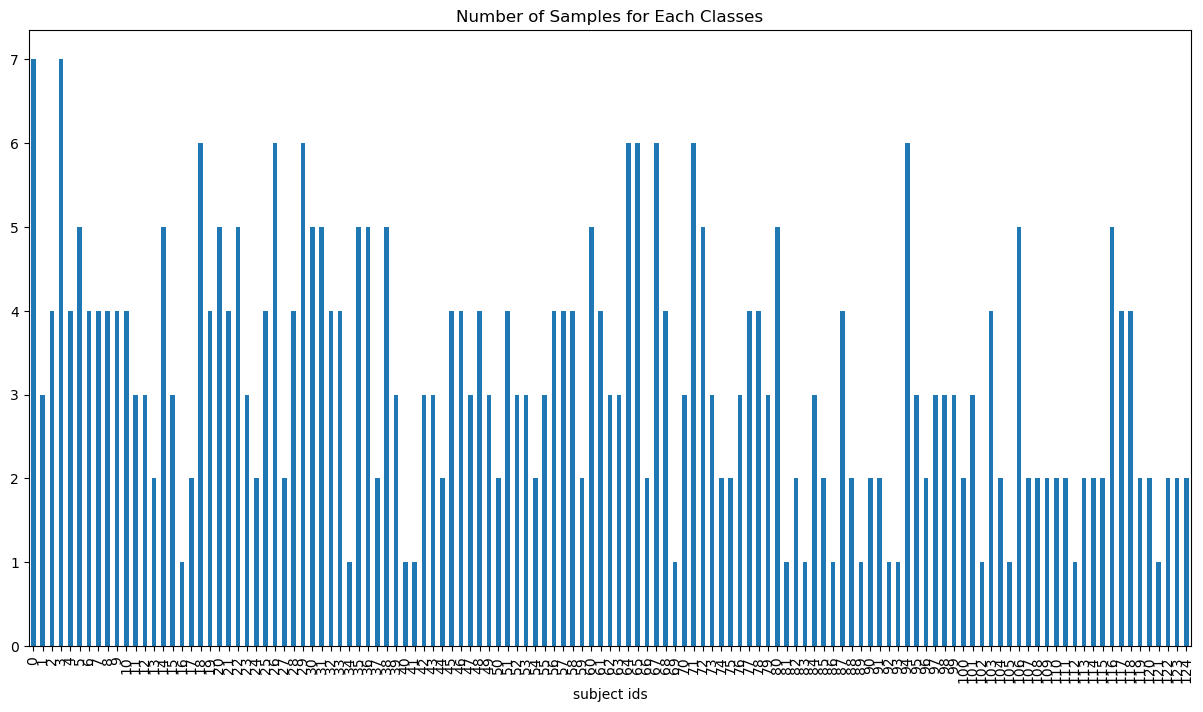

In [16]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_reduced
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

---

## 5. Use set from step 4 to train classifier as in step 3

In [17]:
X = X_reduced
y = y_reduced

print(X.shape)
print(y.shape)

(400, 125)
(400,)


In [18]:
# First split into train + validation (90%) and test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

# Now split the train + validation set (90%) into train (80%) and validation (10%)
# 10/90 = 0.1111
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, random_state=42)

In [19]:
# Use SVC with linear kernel
clf = SVC(kernel='linear', random_state=42)

# Instantiate StratifiedKFold
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Run k-fold CV
cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')

# Print scores
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Train the classifier on the entire training set
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation set accuracy: {val_accuracy:.4f}")

Cross-validation accuracy scores: [0.8     0.74375]
Mean cross-validation accuracy: 0.7719
Validation set accuracy: 0.8500


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


---

## 6. Apply DBSCAN to dataset. Preprocess images and convert into feature vectors. Use DBSCAN to group images based on density.

### a. Using K-Means like previous step

In [65]:
# Reload data
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.data
y = olivetti_faces.target

optimal_k = 125
# Reduce dimensionality to the optimal k found previously
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
X_reduced = kmeans_optimal.fit_transform(X)
print(f"Before: {X.shape}")
print(f"After: {X_reduced.shape}")

Before: (400, 4096)
After: (400, 125)


In [128]:
# use DBSCAN
eps = 10
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan.fit(X_reduced)

labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Subtract 1 for noise (-1 label)
cluster_counts = Counter(labels)
n_noise = list(labels).count(-1)

print(f'eps: {eps}')
print(f'min_samples: {min_samples}')
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')
print(f"Number of samples in each cluster:")
for label, count in sorted(cluster_counts.items()):
    if label == -1:
        print(f"Noise (label -1): {count} samples")
    else:
        print(f"Cluster {label}: {count} samples")
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_reduced, labels)
    print(f"Silhouette Score: {silhouette_avg}")

eps: 10
min_samples: 4
Number of clusters: 26
Number of noise points: 128
Number of samples in each cluster:
Noise (label -1): 128 samples
Cluster 0: 10 samples
Cluster 1: 90 samples
Cluster 2: 13 samples
Cluster 3: 10 samples
Cluster 4: 7 samples
Cluster 5: 4 samples
Cluster 6: 5 samples
Cluster 7: 17 samples
Cluster 8: 4 samples
Cluster 9: 5 samples
Cluster 10: 4 samples
Cluster 11: 5 samples
Cluster 12: 4 samples
Cluster 13: 4 samples
Cluster 14: 13 samples
Cluster 15: 9 samples
Cluster 16: 24 samples
Cluster 17: 5 samples
Cluster 18: 4 samples
Cluster 19: 5 samples
Cluster 20: 5 samples
Cluster 21: 4 samples
Cluster 22: 7 samples
Cluster 23: 6 samples
Cluster 24: 4 samples
Cluster 25: 4 samples
Silhouette Score: 0.016241658478975296


### b. Using PCA to reduce to 2D

In [6]:
# Reload data
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.data
y = olivetti_faces.target

# Reduce dimensionality to 2D with PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(f"Before: {X.shape}")
print(f"After: {X_reduced.shape}")

Before: (400, 4096)
After: (400, 2)


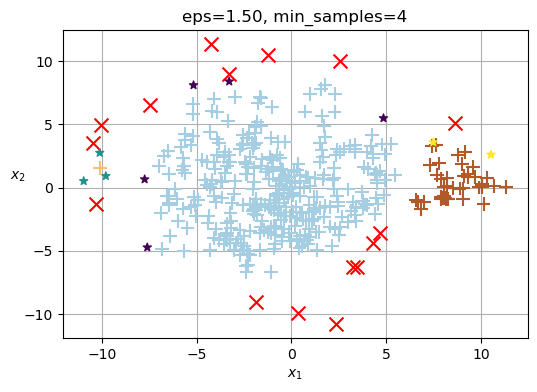

eps: 1.5
min_samples: 4
Number of clusters: 3
Number of noise points: 16
Number of samples in each cluster:
Noise (label -1): 16 samples
Cluster 0: 336 samples
Cluster 1: 4 samples
Cluster 2: 44 samples
Silhouette Score: 0.29664894938468933


In [24]:
# use DBSCAN
eps = 1.5
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan.fit(X_reduced)

# From Reference [3]
# Define function to plot DBSCAN results
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='+', s=size, cmap="Paired")
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker="*")

    if show_xlabels:
        plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

# Plotting the results for DBSCAN with eps=0.05
plt.figure(figsize=(6, 4))
plot_dbscan(dbscan, X_reduced, size=100)
plt.show()

labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Subtract 1 for noise (-1 label)
cluster_counts = Counter(labels)
n_noise = list(labels).count(-1)

print(f'eps: {eps}')
print(f'min_samples: {min_samples}')
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')
print(f"Number of samples in each cluster:")
for label, count in sorted(cluster_counts.items()):
    if label == -1:
        print(f"Noise (label -1): {count} samples")
    else:
        print(f"Cluster {label}: {count} samples")
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_reduced, labels)
    print(f"Silhouette Score: {silhouette_avg}")

---

## References  
[1] https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset  
[2] https://e.centennialcollege.ca/d2l/le/content/1186994/viewContent/15077494/View (K-Means lab)  
[3] https://e.centennialcollege.ca/d2l/le/content/1186994/viewContent/15077600/View (DBSCAN lab)

---